In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import chi2_contingency, ttest_ind

In [4]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [5]:
df = pd.read_csv('Bank-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [7]:
df.describe(include = 'object')

,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [9]:
df.drop(columns = {'RowNumber', 'CustomerId', 'Surname'}, axis = 1, inplace =True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [11]:
df['HasCrCard'].replace({0 : 'No', 1 : 'Yes'}, inplace = True)

In [12]:
df['IsActiveMember'].replace({0 : 'No', 1 : 'Yes'}, inplace = True)
df['Exited'].replace({0 : 'No', 1 : 'Yes'}, inplace = True)
df['Complain'].replace({0 : 'No', 1 : 'Yes'}, inplace = True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes,Yes,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No,Yes,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes,Yes,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,No,No,93826.63,No,No,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No,No,5,GOLD,425


## Non Graphical Analysis

In [14]:
columnss = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Satisfaction Score', 'Card Type']
for i in columnss:
  print(df.value_counts(i))
  print('\n')

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


Gender
Male      5457
Female    4543
Name: count, dtype: int64


NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


HasCrCard
Yes    7055
No     2945
Name: count, dtype: int64


IsActiveMember
Yes    5151
No     4849
Name: count, dtype: int64


Exited
No     7962
Yes    2038
Name: count, dtype: int64


Complain
No     7956
Yes    2044
Name: count, dtype: int64


Satisfaction Score
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64


Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64




- 50% Customers are from France
- 70% Customer have Credit Card
- There seems to be more Male as compared to Females but by small margin
- Complain and Exited seems to have some corelation since they have same numbers
- Marginally have large number of active members as compared to non-active members

## Univariate Analysis:


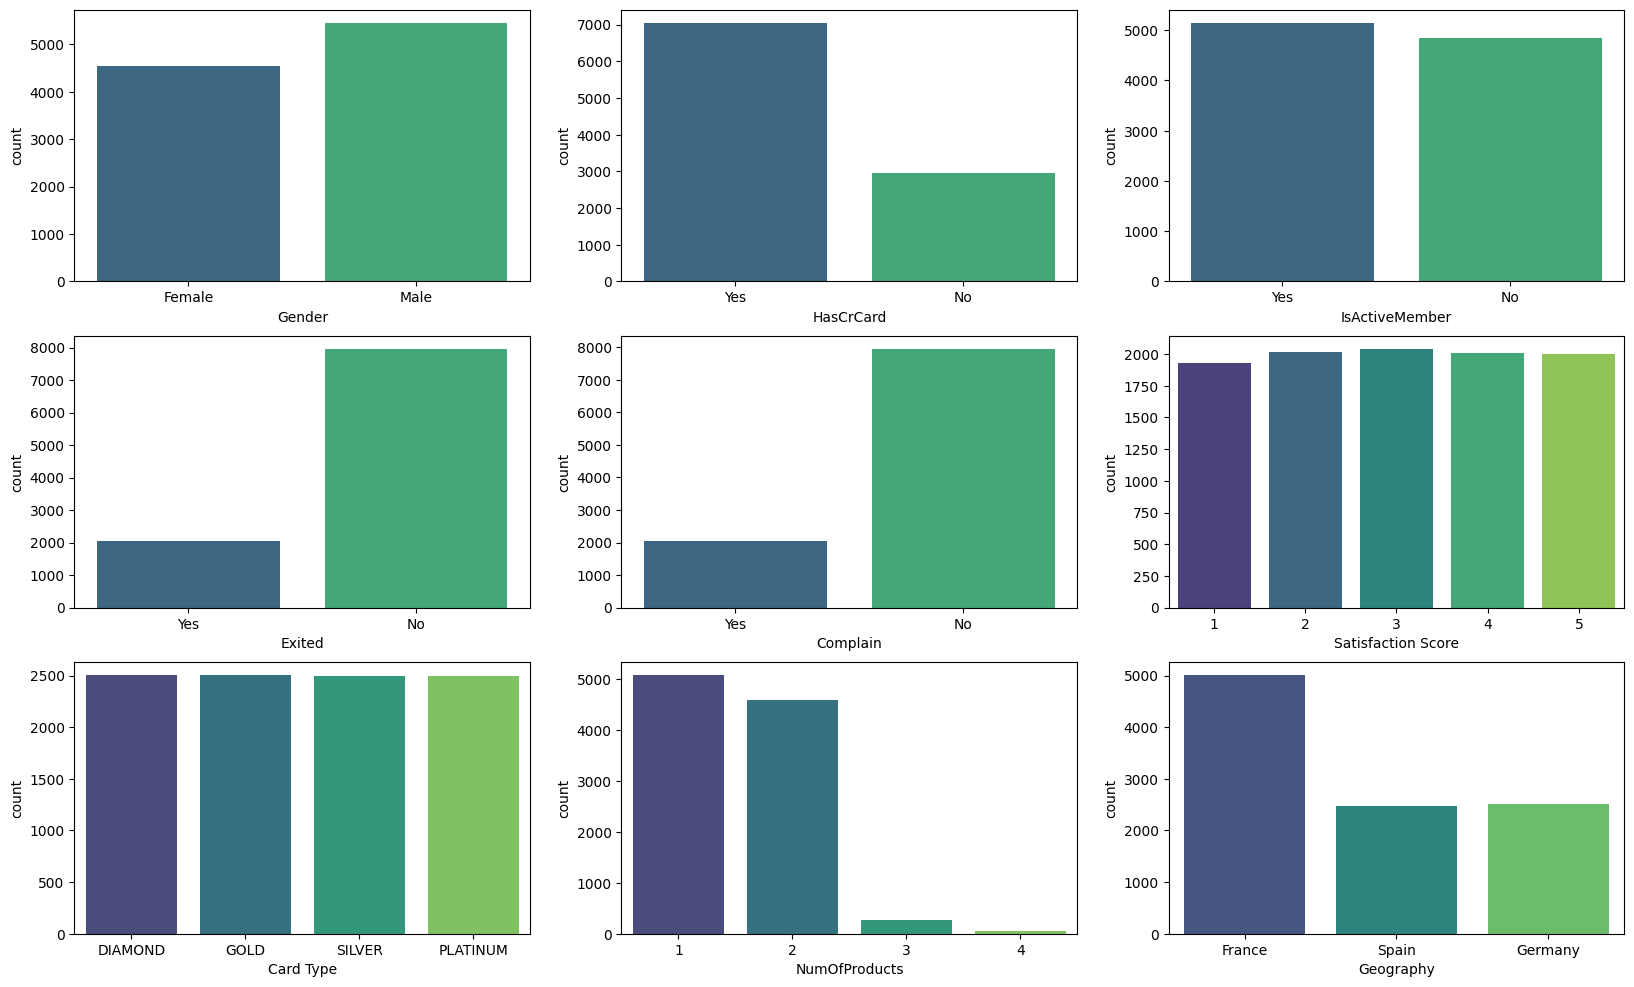

In [15]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (20,12))
sns.countplot(data = df, x = 'Gender', ax = axs[0,0], palette = 'viridis')
sns.countplot(data = df, x = 'HasCrCard', ax = axs[0,1], palette = 'viridis')
sns.countplot(data = df, x = 'IsActiveMember', ax = axs[0,2], palette = 'viridis')
sns.countplot(data = df, x = 'Exited', ax = axs[1,0], palette = 'viridis')
sns.countplot(data = df, x = 'Complain', ax = axs[1,1], palette = 'viridis')
sns.countplot(data = df, x = 'Satisfaction Score', ax = axs[1,2], palette = 'viridis')
sns.countplot(data = df, x = 'Card Type', ax = axs[2,0], palette = 'viridis')
sns.countplot(data = df, x = 'NumOfProducts', ax = axs[2,1], palette = 'viridis')
sns.countplot(data = df, x = 'Geography', ax = axs[2,2], palette = 'viridis')
plt.show()

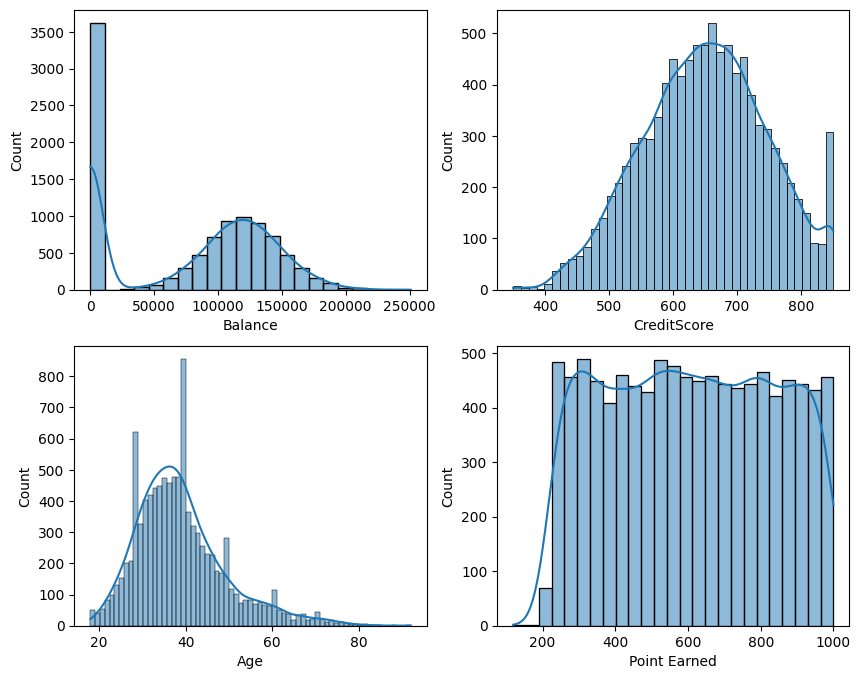

In [16]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))
sns.histplot(data = df, x = 'Balance', kde = True, ax = axs[0,0])
sns.histplot(data = df, x = 'CreditScore', kde = True, ax = axs[0,1])
sns.histplot(data = df, x = 'Age', kde = True, ax = axs[1,0])
sns.histplot(data = df, x = 'Point Earned', kde = True, ax = axs[1,1])
plt.show()

- 3.7k Customer have around 0 Balance account
- More number of people have age around 40

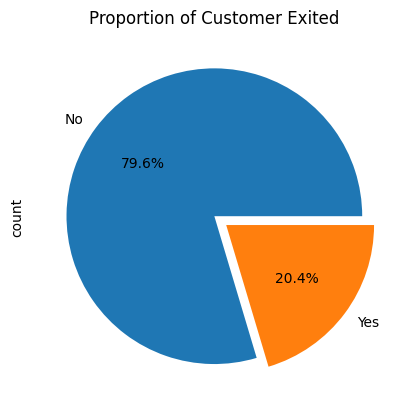

In [17]:
df['Exited'].value_counts().plot.pie(autopct = '%.1f%%', explode = (0,0.1))
plt.title('Proportion of Customer Exited')
plt.show()

- There is 20% Churn Rate

## Bivariate Analysis


In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes,Yes,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No,Yes,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes,Yes,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,No,No,93826.63,No,No,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No,No,5,GOLD,425


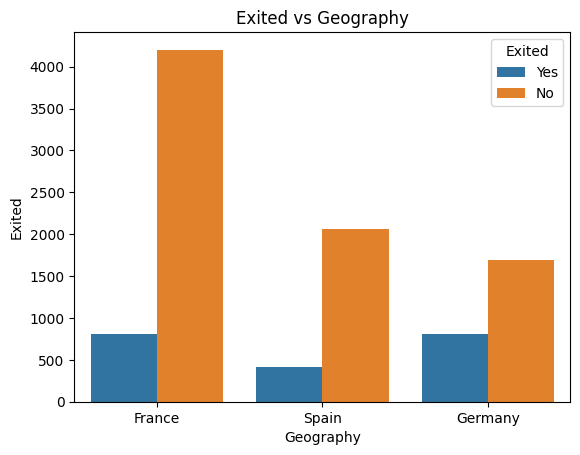

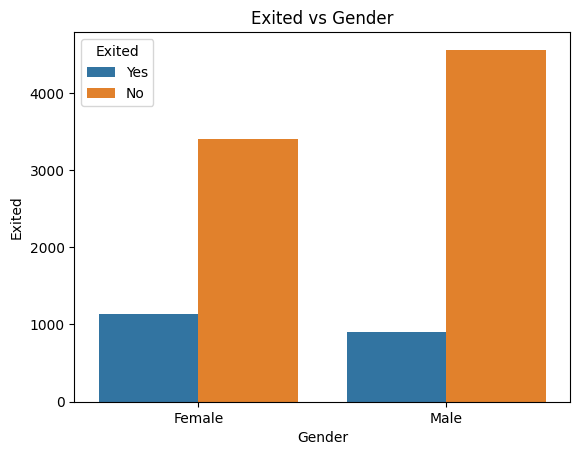

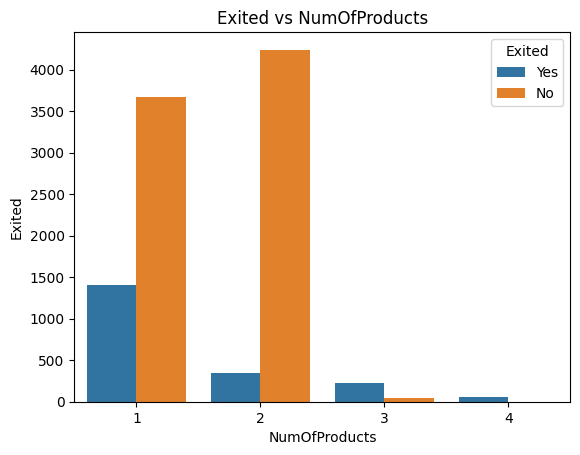

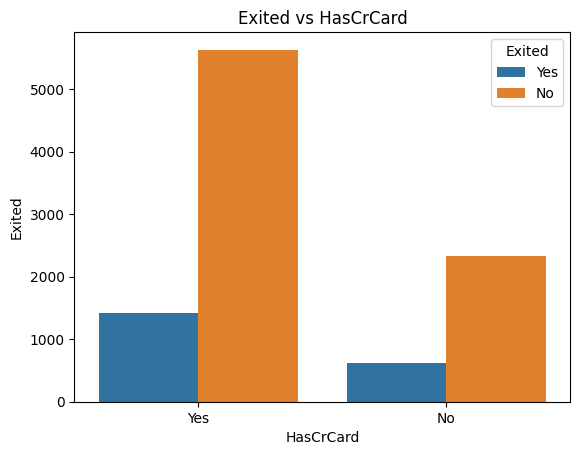

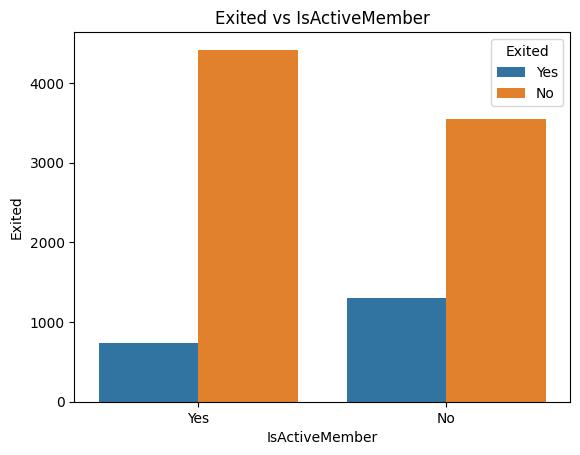

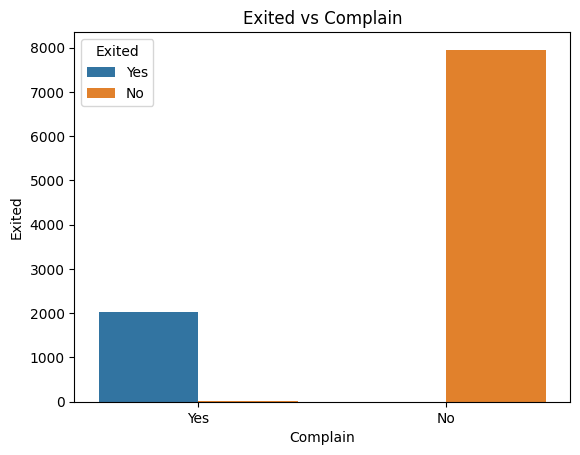

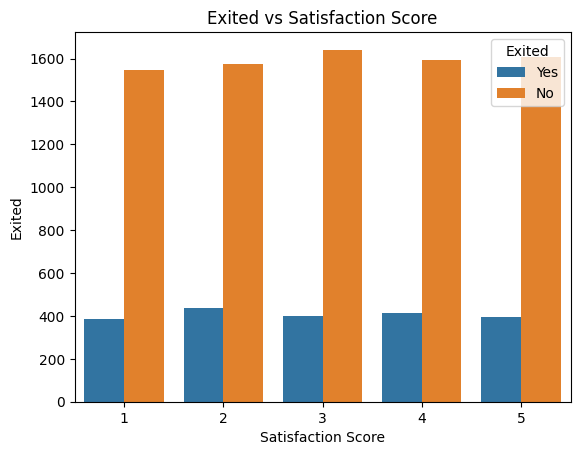

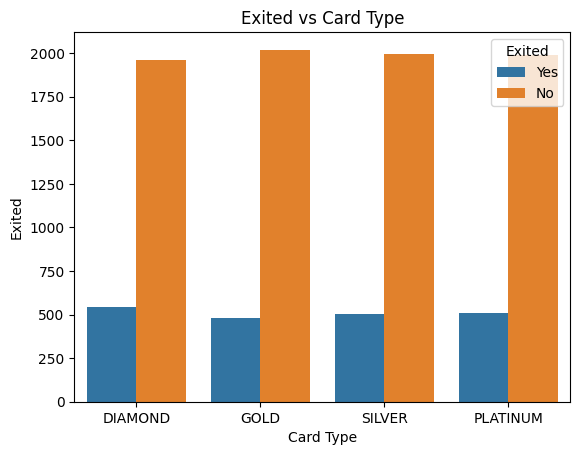

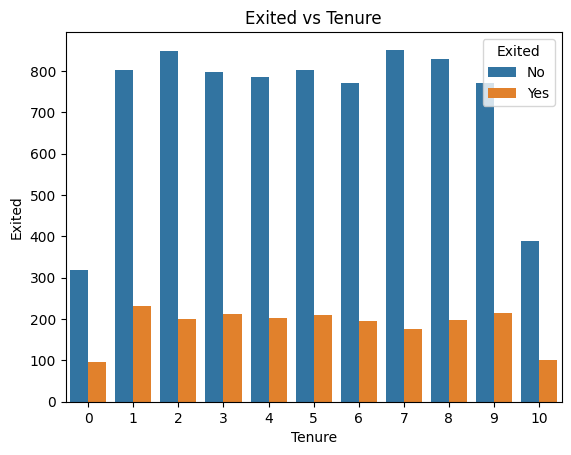

In [19]:
s = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','Complain','Satisfaction Score','Card Type','Tenure']

for i in s:
    sns.countplot(data = df, x = i, hue = 'Exited')
    plt.title(f'Exited vs {i}')
    plt.xlabel(i)
    plt.ylabel('Exited')
    plt.show()

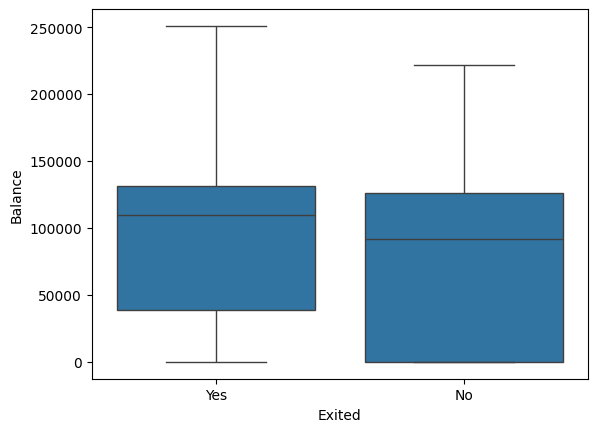

In [20]:
sns.boxplot(data = df, y = 'Balance', x = 'Exited')
plt.show()

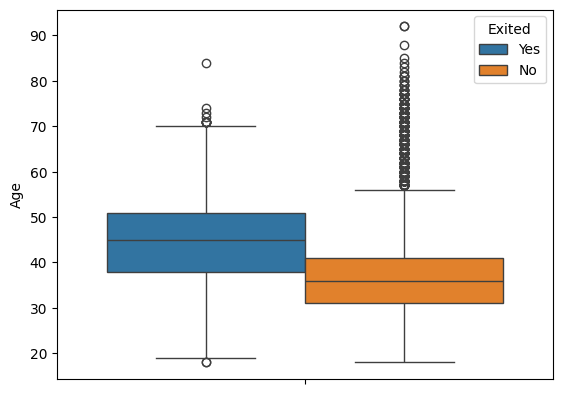

In [21]:
sns.boxplot(data = df, y = 'Age', hue = 'Exited')
plt.show()

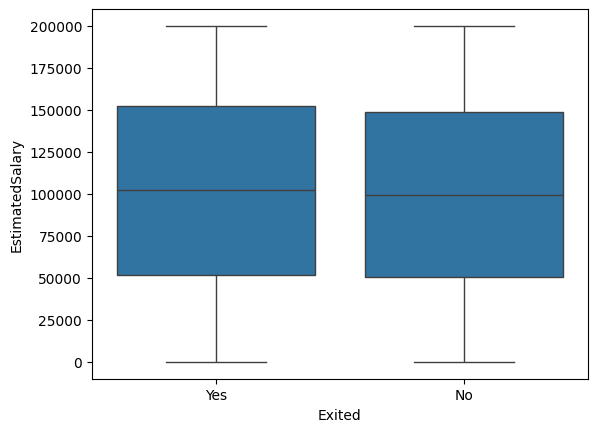

In [22]:
sns.boxplot(data = df, y = 'EstimatedSalary', x = 'Exited')
plt.show()

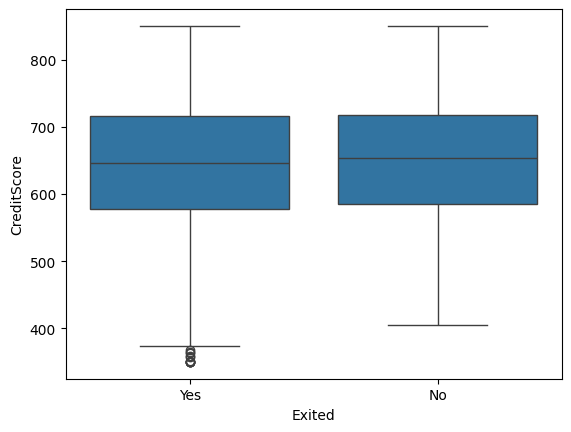

In [23]:
sns.boxplot(data = df, x = 'Exited', y = 'CreditScore')
plt.show()

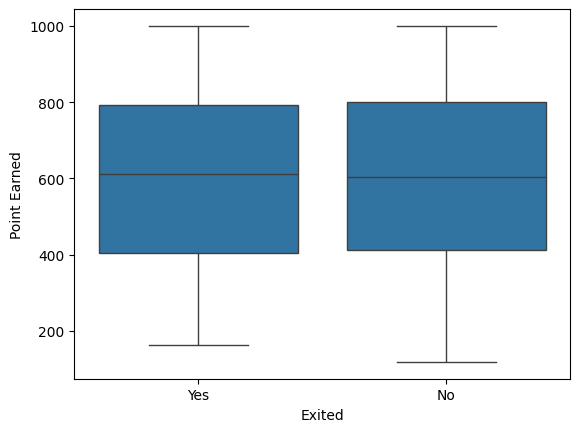

In [24]:
sns.boxplot(data = df, x = 'Exited', y = 'Point Earned')
plt.show()

## Correlation between the fields

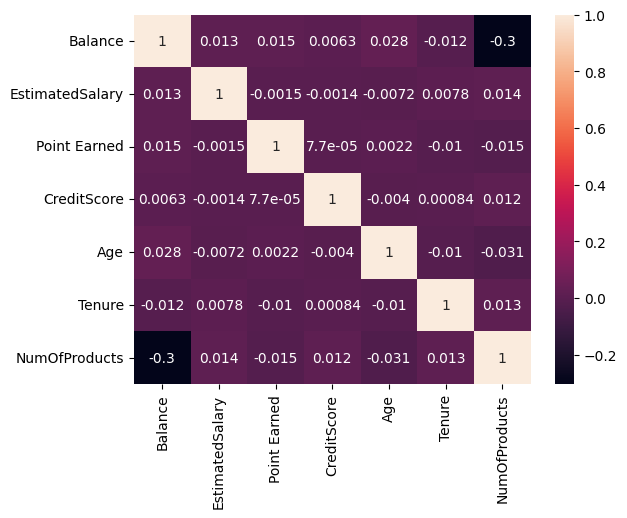

In [25]:
numeric_corr = ['Balance','EstimatedSalary', 'Point Earned', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts']
corr = df[numeric_corr].corr()
sns.heatmap(data = corr, annot = True)
plt.show()

## 0 Balance Customer

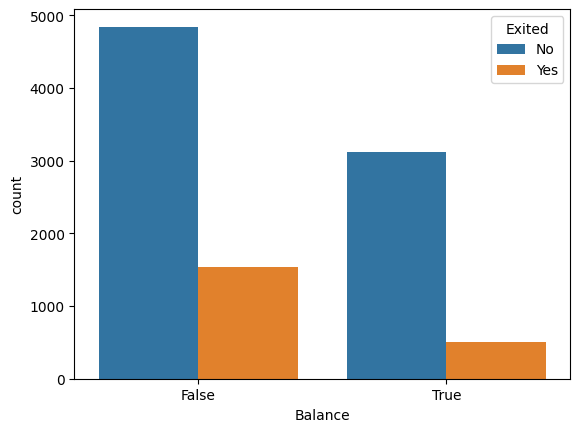

In [26]:
sns.countplot(data = df, x = df['Balance'] == 0, hue = 'Exited')
plt.show()

In [27]:
total_zero_balance = ((df['Balance'] == 0) & (df['Exited'] == 1)).sum()
total_zero_balance

0

## Churn Rate

### For Categorical Columns

In [28]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes,Yes,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No,Yes,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes,Yes,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,No,No,93826.63,No,No,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No,No,5,GOLD,425


In [29]:
df['Exited'].replace({'No' : 0, 'Yes' : 1}, inplace = True)

In [30]:
geography_churn_rate = df.groupby('Geography')['Exited'].mean() * 100
geography_churn_rate

Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64

In [31]:
gender_churn_rate = df.groupby('Gender')['Exited'].mean() * 100
gender_churn_rate

Gender
Female    25.071539
Male      16.474253
Name: Exited, dtype: float64

In [32]:
tenure_churn_rate = df.groupby('Tenure')['Exited'].mean() * 100
tenure_churn_rate

Tenure
0     23.002421
1     22.415459
2     19.179389
3     21.110010
4     20.525784
5     20.652174
6     20.268873
7     17.217899
8     19.219512
9     21.747967
10    20.612245
Name: Exited, dtype: float64

In [33]:
numofpro_churn_rate = df.groupby('NumOfProducts')['Exited'].mean() * 100
numofpro_churn_rate

NumOfProducts
1     27.714398
2      7.603486
3     82.706767
4    100.000000
Name: Exited, dtype: float64

In [34]:
hascard_churn_rate = df.groupby('HasCrCard')['Exited'].mean() * 100
hascard_churn_rate

HasCrCard
No     20.814941
Yes    20.198441
Name: Exited, dtype: float64

In [35]:
IsActiveMember_churn_rate = df.groupby('IsActiveMember')['Exited'].mean() * 100
IsActiveMember_churn_rate

IsActiveMember
No     26.871520
Yes    14.269074
Name: Exited, dtype: float64

In [36]:
Complain_churn_rate = df.groupby('Complain')['Exited'].mean() * 100
Complain_churn_rate

Complain
No      0.050277
Yes    99.510763
Name: Exited, dtype: float64

In [37]:
Satisfaction_Score_churn_rate = df.groupby('Satisfaction Score')['Exited'].mean() * 100
Satisfaction_Score_churn_rate

Satisfaction Score
1    20.031056
2    21.797418
3    19.637610
4    20.617530
5    19.810379
Name: Exited, dtype: float64

In [38]:
Card_Type_churn_rate = df.groupby('Card Type')['Exited'].mean() * 100
Card_Type_churn_rate

Card Type
DIAMOND     21.779019
GOLD        19.264588
PLATINUM    20.360721
SILVER      20.112179
Name: Exited, dtype: float64

In [39]:
bins = [18,30,45,58,75,93]
labels = ['18-29','30-44','45-57','58-74','75-92']

df['Age_bin'] = pd.cut(df['Age'], bins = bins, labels = labels, right = False)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age_bin
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,1,Yes,2,DIAMOND,464,30-44
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,0,Yes,3,DIAMOND,456,30-44
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,1,Yes,3,DIAMOND,377,30-44
3,699,France,Female,39,1,0.00,2,No,No,93826.63,0,No,5,GOLD,350,30-44
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,0,No,5,GOLD,425,30-44


In [40]:
Age_bin_churn_rate = df.groupby('Age_bin')['Exited'].mean() * 100
Age_bin_churn_rate

Age_bin
18-29     7.556368
30-44    14.454228
45-57    49.732938
58-74    34.109817
75-92     1.851852
Name: Exited, dtype: float64

### For Numerical Columns

In [41]:
CreditScore_churn_rate = df[df['Exited'] == 1]['CreditScore'].mean() * 100
print(f'Churned Customer for Credit Score: {CreditScore_churn_rate}')

CreditScore_churn_rate = df[df['Exited'] == 0]['CreditScore'].mean() * 100
print(f'Non Churned Customer for Credit Score: {CreditScore_churn_rate}')

Churned Customer for Credit Score: 64541.462217860644
Non Churned Customer for Credit Score: 65183.78548103492


In [42]:
Age_churn_rate = df[df['Exited'] == 1]['Age'].mean() * 100
print(f'Churned Customer for Age: {Age_churn_rate}')

Age_churn_rate = df[df['Exited'] == 0]['Age'].mean() * 100
print(f'Non Churned Customer for Age: {Age_churn_rate}')

Churned Customer for Age: 4483.562315996075
Non Churned Customer for Age: 3740.8063300678223


In [43]:
Balance_churn_rate = df[df['Exited'] == 1]['Balance'].mean() * 100
print(f'Churned Customer for Balance: {Balance_churn_rate}')

Balance_churn_rate = df[df['Exited'] == 0]['Balance'].mean() * 100
print(f'Non Churned Customer for Balance: {Balance_churn_rate}')

Churned Customer for Balance: 9110947.600588812
Non Churned Customer for Balance: 7274275.066314995


In [44]:
EstimatedSalary_churn_rate = df[df['Exited'] == 1]['EstimatedSalary'].mean() * 100
print(f'Churned Customer for EstimatedSalary: {EstimatedSalary_churn_rate}')

EstimatedSalary_churn_rate = df[df['Exited'] == 0]['EstimatedSalary'].mean() * 100
print(f'Non Churned Customer for EstimatedSalary: {EstimatedSalary_churn_rate}')

Churned Customer for EstimatedSalary: 10150990.878312068
Non Churned Customer for EstimatedSalary: 9972685.314117055


- It is cleared that 99% complaints are not resolved
- Germany have higher churn rate
- Females are more likey to churn
- Those with 3 or more number of products are more likely to churn

## Hypothesis Testing

∇ Satisfaction Score Vs Complain

- Null Hypothesis : There is no significant difference in satisfaction score of customer who have exited with complain and exited without complain

- Alternative Hypothesis : There is significant difference in satisfaction score of customer who have exited with complain and exited without complain

In [58]:
satis_com = pd.crosstab(df[df['Exited'] == 1]['Satisfaction Score'], df['Complain'])

chi2, pval, a, b = chi2_contingency(satis_com)
alpha = 0.05

if pval<alpha :
  print('Reject Null Hypothesis')
else:
  print('Failed to Reject Null Hypothesis')

Failed to Reject Null Hypothesis


- There is significant difference in satisfaction score of customer who have exited with complain and exited without complain

∇ Geography and Customer Churn

- Null Hypothesis : There is no association between the geographical locations of the customer and exiting the Bank

- Alternative Hypothesis : There is association between the geographical locations of the customer and exiting the Bank

In [61]:
geo_exit = pd.crosstab(df['Exited'], df['Geography'])

stest, pval, a, b = chi2_contingency(geo_exit)
alpha = 0.05

if pval < alpha :
  print('Reject Null Hypothesis')
else:
  print('Failed to Reject Null Hypothesis')

Reject Null Hypothesis


-  There is association between the geographical locations of the customer and exiting the Bank

∇ Gender Vs Customer Churn

- Null Hypothesis : There is no association between the Gender and customer exiting the bank

- Alternative Hypothesis : These is association between the Gender and customer exiting the bank

In [63]:
gen_exit = pd.crosstab(df['Exited'], df['Gender'])

stest, pval, a, b = chi2_contingency(gen_exit)
alpha = 0.05

if pval < alpha :
  print('Reject Null Hypothesis')
else:
  print('Failed to Reject Null Hypothesis')

Reject Null Hypothesis


- These is association between the Gender and customer exiting the bank

∇ Number Of Products Vs Customer Churn

Null Hypothesis : There is no significant difference between the Number of products customer buying and exiting the bank

Alternative Hypothesis : There is significant difference between the Number of products customer buying and exiting the bank

In [65]:
num_exit = pd.crosstab(df['Exited'], df['NumOfProducts'])

stest, pval, a, b = chi2_contingency(num_exit)
alpha = 0.05

if pval < alpha :
  print('Reject Null Hypothesis')
else:
  print('Failed to Reject Null Hypothesis')

Reject Null Hypothesis


- There is significant difference between the Number of products customer buying and exiting the bank

∇ IsActiveMember Vs Customer Churn

- Null Hypothesis : There is no association betweeen Active Customer and exiting the bank

- Alternative Hypothesis : There is an association betweeen Active Customer and exiting the bank

In [66]:
act_exit = pd.crosstab(df['Exited'], df['IsActiveMember'])

stest, pval, a, b = chi2_contingency(act_exit)
alpha = 0.05

if pval < alpha :
  print('Reject Null Hypothesis')
else:
  print('Failed to Reject Null Hypothesis')

Reject Null Hypothesis


- There is an association betweeen Active Customer and exiting the bank

∇ Complain Vs Customer Churn

- Null Hypothesis : There is no association between complain by customers and exiting the bank

- Alternative Hypothesis : There is association between complain by customers and exiting the bank

In [67]:
com_exit = pd.crosstab(df['Exited'], df['Complain'])

stest, pval, a, b = chi2_contingency(com_exit)
alpha = 0.05

if pval < alpha :
  print('Reject Null Hypothesis')
else:
  print('Failed to Reject Null Hypothesis')

Reject Null Hypothesis


- There is association between complain by customers and exiting the bank

∇ Credit Score Vs Customer Churn

Null Hypothesis : There is no significant difference between the mean of credit score who exited the bank and not exited the bank

Alternative Hypothesis : There is significant difference between the mean of credit score who exited the bank and not exited the bank

In [78]:
c_exited = df[df['Exited'] == 1]['CreditScore']
c_stayed = df[df['Exited'] == 0]['CreditScore']

alpha = 0.05
stats, pval = ttest_ind(c_stayed, c_exited, equal_var = False)

if pval < alpha :
  print('Reject Null Hypothesis')
else:
  print('Failed to Reject Null Hypothesis')

Reject Null Hypothesis


- There is significant difference between the mean of credit score who exited the bank and not exited the bank

∇ Age Vs Customer Churn

- Null Hypothesis : There is no significant difference between the mean age of the customer who exited and not exited

- Alternative Hypothesis : There is significant difference between the mean age of the customer who exited and not exited

In [79]:
a_exited = df[df['Exited'] == 1]['Age']
a_stayed = df[df['Exited'] == 0]['Age']

alpha = 0.05
stats, pval = ttest_ind(a_stayed, a_exited, equal_var = False)

if pval < alpha :
  print('Reject Null Hypothesis')
else:
  print('Failed to Reject Null Hypothesis')

Reject Null Hypothesis


- There is significant difference between the mean age of the customer who exited and not exited

∇ Balance Vs Customer Churn

- Null Hypothesis : There is no significant difference between the mean balance of the customer who exited and not exited

- Alternative Hypothesis : There is significant difference between the mean balance of the customer who exited and not exited

In [80]:
b_exited = df[df['Exited'] == 1]['Balance']
b_stayed = df[df['Exited'] == 0]['Balance']

alpha = 0.05
stats, pval = ttest_ind(b_stayed, b_exited, equal_var = False)

if pval < alpha :
  print('Reject Null Hypothesis')
else:
  print('Failed to Reject Null Hypothesis')

Reject Null Hypothesis


-  There is significant difference between the mean balance of the customer who exited and not exited

## Actionable Insights

- **Expand Marketing Efforts in Germany and Spain**: Since 50% of customers are from France, focus marketing campaigns on Germany and Spain to boost customer acquisition in these regions.

- **Develop Targeted Offers for Female Customers**: Introduce specific products or offers aimed at attracting more female customers to balance the customer demographics.

- **Enhance After-Sales Service**: Address the fact that almost 99% of customers who filed complaints have left the bank by significantly improving the after-sales service experience.

- **Create Retention Strategies for Multi-Product Holders**: Implement targeted retention strategies for customers with three or more products, as they have a higher churn rate.

- **Engage Zero Balance Account Holders**: Investigate why approximately 3,000 accounts have zero balance and develop offers or incentives to engage these customers and encourage account usage.

- **Financial Counseling for At-Risk Customers**: Analyze factors influencing customer exit versus retention and offer financial counseling to customers in vulnerable salary brackets to reduce churn.